<a href="https://colab.research.google.com/github/neurosxx/dsc-phase-2-project-v3/blob/main/movie_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Understanding

In this project, we wil be looking at multiple movie datasets to determine which type of films are presently leading at the box office.  Then, this conclusion will assist a new studio to emulate the most profitable film types.

[insert researched info here]

# Data Understanding
To obtain more infomration relevant to films, a dataset from  will be utilized

**Limitations**

This data is only focused on movies, therefore it is not able to be generalized to the entire entertainment industry.  Further, as the dataset only contains the total gross, it will not incldue the costs of creating the movies. Finally, The dataset only looks at box office revenue, which means that the total revenue ( from streaming sites or other sources) may be higher.

# Data Preparation

Initally, we will import packages required to analyze the data. Next, we will incorporate our datasets and become familiarized with the data.



In [1]:
# Providing necessary databases
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql
import zipfile
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
!wget https://github.com/learn-co-curriculum/dsc-phase-2-project-v3/raw/refs/heads/main/zippedData/im.db.zip
! unzip im.db.zip -d data


--2025-01-04 23:35:59--  https://github.com/learn-co-curriculum/dsc-phase-2-project-v3/raw/refs/heads/main/zippedData/im.db.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/learn-co-curriculum/dsc-phase-2-project-v3/refs/heads/main/zippedData/im.db.zip [following]
--2025-01-04 23:35:59--  https://raw.githubusercontent.com/learn-co-curriculum/dsc-phase-2-project-v3/refs/heads/main/zippedData/im.db.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67149708 (64M) [application/zip]
Saving to: ‘im.db.zip.1’

im.db.zip.1         100%[===================>]  64.04M   141MB/s    in 0.5s    

2025-01

In [3]:
# create connection to the database and cursor object:
conn = sql.connect('data/im.db')
cur = conn.cursor()

# find table names
cur.execute(""" SELECT name
                FROM sqlite_master
                WHERE type = 'table';""")

# fetch result and store it in names_table
names_table= cur.fetchall()
names_table

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',),
 ('movie_gross',)]

In [4]:
df_movie_budget = pd.read_csv('https://github.com/learn-co-curriculum/dsc-phase-2-project-v3/raw/refs/heads/main/zippedData/tn.movie_budgets.csv.gz')

In [5]:
df_movie_budget
#seperate release_date into datetime object.
#Cross reference movie wit year to make sure titles that have same name are not counted as one movie.
# compare what matches up, then create a compound conditional. if it does match, append on data frame that doesn't have production budget.

# Production_budget is independent variable.- X axis
# Domestic_gross is dependent variable - Y axis

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [6]:
df_movie_budget['release_date'].value_counts()

,count
release_date,
"Dec 31, 2014",24
"Dec 31, 2015",23
"Dec 31, 2010",15
"Dec 31, 2008",14
"Dec 31, 2009",13
...,...
"Oct 21, 1977",1
"Jun 23, 2009",1
"Sep 26, 2017",1


In [7]:
df_movie_budget['release_date'] = pd.to_datetime(df_movie_budget['release_date'])

In [8]:
df_movie_budget['release_year'] = df_movie_budget['release_date'].dt.year

In [9]:
duplicated_movies = df_movie_budget.loc[df_movie_budget['movie'].duplicated(keep=False) == True].sort_values('movie', ascending=True)
# looking for next step: where
duplicated_movies.describe()

,id,release_date,release_year
count,165.000000,165,165.000000
mean,53.072727,1997-04-18 21:49:05.454545408,1996.769697
min,1.000000,1915-02-08 00:00:00,1915.000000
25%,31.000000,1986-04-18 00:00:00,1986.000000
50%,55.000000,2005-07-08 00:00:00,2005.000000
75%,76.000000,2013-02-08 00:00:00,2013.000000
max,100.000000,2019-06-14 00:00:00,2019.000000
std,28.317357,NaN,21.622770


In [10]:
duplicated_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165 entries, 4270 to 302
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 165 non-null    int64         
 1   release_date       165 non-null    datetime64[ns]
 2   movie              165 non-null    object        
 3   production_budget  165 non-null    object        
 4   domestic_gross     165 non-null    object        
 5   worldwide_gross    165 non-null    object        
 6   release_year       165 non-null    int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(4)
memory usage: 9.7+ KB


In [11]:
# duplicated_movies.drop(df_movie_budget.index == 65, inplace=True)
# 50:101 one of Home needs deleted.
#100:150 #were good


# Check movie name & year, and check where movie and year are a match. Do it in the original dataframe.
# go through & look by doing df_movie_budget [0:50], [51:100] (make sure it doesn't become truncated), delete where there is duplicate!

In [12]:
duplicated_movies[65:66]
# SAME! - make sure to delete this.

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
3455,56,2009-06-05,Home,"$12,000,000",$0,$0,2009


In [13]:
numeric_columns = ['production_budget', 'domestic_gross', 'worldwide_gross']


In [14]:
for column in numeric_columns:
    duplicated_movies[column] = duplicated_movies[column].str.replace('$', '').str.replace(',', '').astype(float)
  # only 165 values displayed, need to troubleshoot
  # Have duplicate code, need to figure out which is preferable to use.

In [15]:
duplicated_movies[numeric_columns] = duplicated_movies[numeric_columns].astype(float)
# changing only specific columns to floats

In [16]:
print(duplicated_movies['production_budget'].describe())

count    1.650000e+02
mean     4.073306e+07
std      5.251290e+07
min      5.000000e+04
25%      5.800000e+06
50%      1.800000e+07
75%      5.500000e+07
max      2.250000e+08
Name: production_budget, dtype: float64


In [17]:
duplicated_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165 entries, 4270 to 302
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 165 non-null    int64         
 1   release_date       165 non-null    datetime64[ns]
 2   movie              165 non-null    object        
 3   production_budget  165 non-null    float64       
 4   domestic_gross     165 non-null    float64       
 5   worldwide_gross    165 non-null    float64       
 6   release_year       165 non-null    int32         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(1), object(1)
memory usage: 9.7+ KB


<Axes: xlabel='production_budget', ylabel='domestic_gross'>

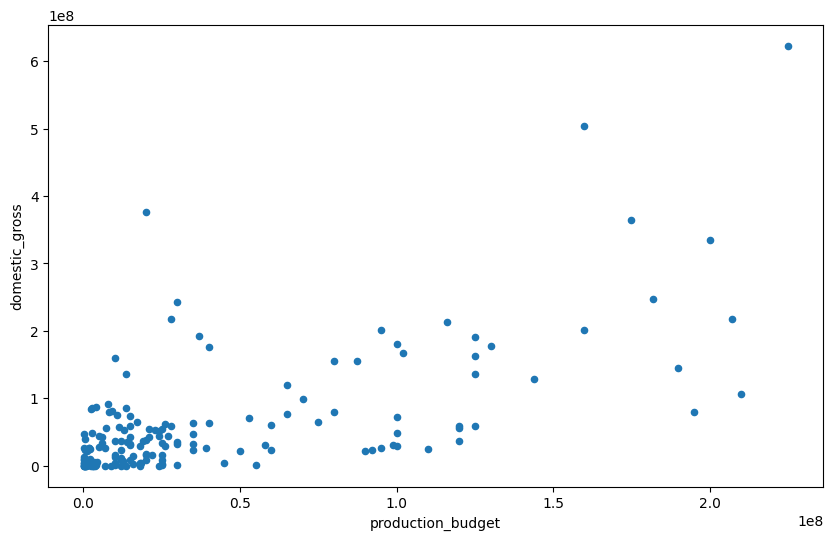

In [18]:
duplicated_movies.plot(kind='scatter', x='production_budget', y='domestic_gross', figsize=(10, 6))

<Axes: xlabel='production_budget', ylabel='worldwide_gross'>

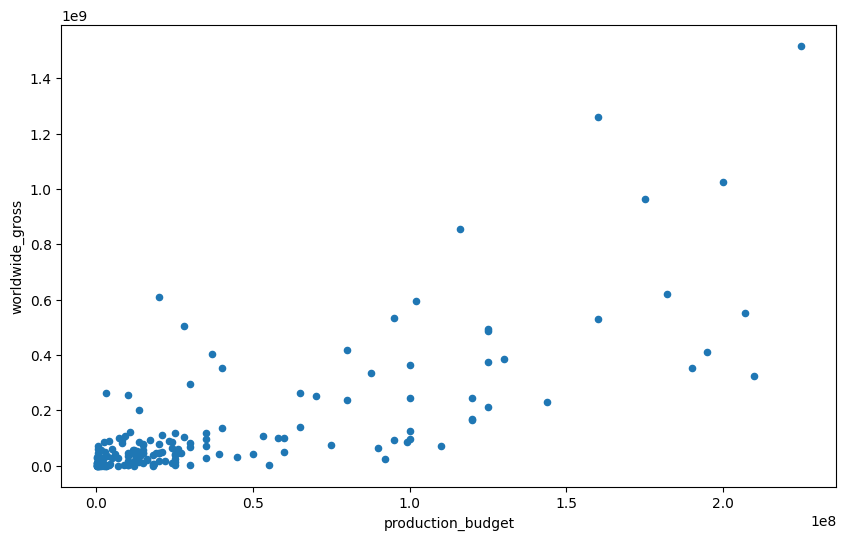

In [19]:
duplicated_movies.plot(kind='scatter', x='production_budget', y='worldwide_gross', figsize=(10, 6))

In [20]:
# !unzip im.db.zip -d data

In [21]:
zip_file_path = 'im.db.zip'
destination_folder = 'data/'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_folder)

# Go to repo and paste in raw

In [22]:
df_movie_gross = pd.read_csv('https://github.com/learn-co-curriculum/dsc-phase-2-project-v3/raw/refs/heads/main/zippedData/bom.movie_gross.csv.gz')
# df_movie gross columns =  title, studio, domesticGross, foreignGross, Year

In [23]:
df_movie_gross.head()
# This is bom.movie_gross.csv.gz

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [24]:
# df_movie_gross.apply()
# use this to apply the function made further below

In [25]:
df_movie_gross['studio'].value_counts()[:50]
df_movie_gross['studio'] = df_movie_gross['studio'].replace('FoxS', 'Fox')
df_movie_gross['studio'] = df_movie_gross['studio'].replace('WB (NL)', 'WB')
# Replaces studio names to be uniformally named

In [26]:
df_movie_gross['studio'].value_counts().head()

,count
studio,
Fox,203
WB,185
IFC,166
Uni.,147
Magn.,136


In [27]:
# def calculate_roi(initial_investment, final_value):
#   # Formula for calculating ROI:
#   # ROI = ((Final_value = initial_investment) / initial_investment) * 100
#   roi = ((final_value - initial_investment) / initial_investment) * 100

#   return roi

# print("Welcome to the Return on Investment (ROI) Calculator!")

# initial_investment = float(input("Please enter the initial investment amount (S): "))
# final_value = float(input("Enter the final value of the investment (#): "))

# roi = calculate_roi(initial_investment, final_value)



In [28]:
 #Convert 'worldwide_gross' and 'production_budget' to numeric
for column in ['worldwide_gross', 'production_budget']:
    df_movie_budget[column] = df_movie_budget[column].str.replace('$', '').str.replace(',', '').astype(float)

In [29]:
# Creating ROI column in df_movie_budget
df_movie_budget['Roi'] = ((df_movie_budget['worldwide_gross'] - df_movie_budget['production_budget']) / df_movie_budget['production_budget']) * 100

In [30]:
df_movie_gross['foreign_gross'] = pd.to_numeric(df_movie_gross['foreign_gross'], errors='coerce')
df_movie_gross['domestic_gross'] = pd.to_numeric(df_movie_gross['domestic_gross'], errors='coerce')

# Now perform the addition
Gross = df_movie_gross['foreign_gross'] + df_movie_gross['domestic_gross']

In [31]:
df_movie_gross.isnull().sum()

,0
title,0
studio,5
domestic_gross,28
foreign_gross,1355
year,0


In [32]:
df_movie_gross.dropna(subset=['studio', 'domestic_gross', 'foreign_gross'], inplace=True)

In [33]:
df_movie_gross.isnull().sum()

,0
title,0
studio,0
domestic_gross,0
foreign_gross,0
year,0


In [34]:
universal_studio = df_movie_gross[df_movie_gross['studio'] == 'Uni.']

In [35]:
universal_studio.head()

,title,studio,domestic_gross,foreign_gross,year
8,Despicable Me,Uni.,251500000.0,291600000.0,2010
18,Robin Hood,Uni.,105300000.0,216400000.0,2010
20,Little Fockers,Uni.,148400000.0,162200000.0,2010
49,The Wolfman,Uni.,62000000.0,77800000.0,2010
66,Green Zone,Uni.,35100000.0,59800000.0,2010


In [36]:
db_path = destination_folder + 'im.db'

In [37]:
# conn = sqlite3.connect(db_path)
# cursor = conn.cursor()

In [38]:
# creating imbd_movie_basics dataframe
imbd_movie_basics = pd.read_sql_query("""
SELECT *
FROM movie_basics
LIMIT 10;
""", conn)
imbd_movie_basics


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


In [39]:
# creating a dataframe for the directors table
imbd_directors = pd.read_sql_query("""
SELECT *
FROM directors
LIMIT 10;
""", conn)
imbd_directors

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
5,tt0878654,nm2291498
6,tt0878654,nm2292011
7,tt0879859,nm2416460
8,tt0996958,nm2286991
9,tt0996958,nm2286991


In [40]:
# getting data & creating the dataframe for the known_for table
imbd_known_for = pd.read_sql_query("""
SELECT *
FROM known_for
LIMIT 10;
""", conn)
imbd_known_for

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534
5,nm0061865,tt6791238
6,nm0061865,tt0287072
7,nm0061865,tt1682940
8,nm0062070,tt1470654
9,nm0062070,tt0363631


In [41]:
# creating the dataframe for the movie_akas table
imbd_movie_akas = pd.read_sql_query("""
SELECT *
FROM movie_akas
LIMIT 10;
""", conn)
imbd_movie_akas

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
5,tt0369610,15,Jurassic World,GR,None,imdbDisplay,None,0.0
6,tt0369610,16,Jurassic World,IT,None,imdbDisplay,None,0.0
7,tt0369610,17,Jurski svijet,HR,None,imdbDisplay,None,0.0
8,tt0369610,18,Olam ha'Yura,IL,he,imdbDisplay,None,0.0
9,tt0369610,19,Jurassic World: Mundo Jurásico,MX,None,imdbDisplay,None,0.0


In [42]:
# creating the dataframe for the movie_ratings (from imbd) table
df_movie_ratings = pd.read_sql_query("""
SELECT *
FROM movie_ratings
LIMIT 10;
""", conn)
df_movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
5,tt1069246,6.2,326
6,tt1094666,7.0,1613
7,tt1130982,6.4,571
8,tt1156528,7.2,265
9,tt1161457,4.2,148


In [43]:
# creating the dataframe for the persons table
imbd_persons = pd.read_sql_query("""
SELECT *
FROM persons
LIMIT 10;
""", conn)
imbd_persons

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,None,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,None,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,None,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,None,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,None,"production_designer,art_department,set_decorator"
5,nm0062879,Ruel S. Bayani,NaN,None,"director,production_manager,miscellaneous"
6,nm0063198,Bayou,NaN,None,actor
7,nm0063432,Stevie Be-Zet,NaN,None,"composer,soundtrack"
8,nm0063618,Jeff Beal,1963.0,None,"composer,music_department,soundtrack"
9,nm0063750,Lindsay Beamish,NaN,None,"actress,miscellaneous"


In [44]:
# creating the dataframe for the principals table
imbd_principals = pd.read_sql_query("""
SELECT *
FROM principals
LIMIT 10;
""", conn)
imbd_principals

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
5,tt0323808,2,nm2694680,actor,None,"[""Steve Thomson""]"
6,tt0323808,3,nm0574615,actor,None,"[""Sir Lachlan Morrison""]"
7,tt0323808,4,nm0502652,actress,None,"[""Lady Delia Morrison""]"
8,tt0323808,5,nm0362736,director,None,None
9,tt0323808,6,nm0811056,producer,producer,None


In [45]:
# creating the dataframe for the writers table
imbd_writers = pd.read_sql_query("""
SELECT *
FROM writers
LIMIT 10;
""", conn)
imbd_writers

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087
5,tt0835418,nm0841532
6,tt0878654,nm0284943
7,tt0878654,nm0284943
8,tt0878654,nm0284943
9,tt0996958,nm2286991


**Box Office MOJO (BOM) Dataset**

Intitally, we will create and read the BOM dataframe. After this, we will clean column value types for the BOM dataset (bom_df).

In [46]:
 # Creating the data & checking the columns' data types
df_movie_gross = pd.read_csv('https://github.com/learn-co-curriculum/dsc-phase-2-project-v3/raw/refs/heads/main/zippedData/bom.movie_gross.csv.gz')
print(df_movie_gross.dtypes)

# Removing commas before we make transformations
df_movie_gross['foreign_gross'] = df_movie_gross['foreign_gross'].str.replace(',', '')

# transforming string object into a float
df_movie_gross = df_movie_gross.astype({'foreign_gross': 'float'})

# transforming string object into a float
df_movie_gross = df_movie_gross.astype({'domestic_gross': np.float64})

# Check to see if transformation was successful
print(df_movie_gross.dtypes)

# Check to see number of Null values in 'foreign_gross' column
print(f"  Number of Null values in 'foreign_gross' column: {df_movie_gross['foreign_gross'].isnull().sum()}")

# Check to see number of null values in 'title' column
print(f"  Number of Null values in 'title' column: {df_movie_gross['title'].isnull().sum()}")

# drop rows with Null values in 'foreign_gross' and 'title' columns
df_movie_gross.dropna(subset=['foreign_gross', 'domestic_gross', 'studio', 'title'], inplace=True)

# check for NaN values in 'foreign_gross and 'title'
print(f"  Number of NaN values in 'foreign_gross' column: {df_movie_gross['foreign_gross'].isna().sum()}")
# df_movie gross columns =  title, studio, domesticGross, foreignGross, Year

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object
title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object
  Number of Null values in 'foreign_gross' column: 1350
  Number of Null values in 'title' column: 0
  Number of NaN values in 'foreign_gross' column: 0


In [47]:
imbd_movie_basics.dropna(subset=['runtime_minutes'], inplace=True)

**Questions about the Data & Data Analysis**
* Is there a relationship between actors and higher grossing flims?
* Do movies with increased average ratings result in higher grossing films?
* Do certain genres result in higher grossing films?

We will notice that the above questions are related to the gross of the movies.  This is due to factors of generating a profit, productions costs for movie require significant capital.  After answering the previous questions, we may have some recommendations to provide a path to make high grossing, successful movies.


# Do certain genres result in higher grossing films?

To be able to answer this question, we require to organize our data types

Let's start by saving df_movie_gross in a SQLite database. Then, we are able to use SQLite to join and query the df_movie_gross and the imbd_movie_basics data set.  















In [48]:
df_movie_gross.to_sql('movie_gross', conn, if_exists='replace', index=False)

2007

Now, we are able to query df_movie_gross using SQLite:

In [49]:
pd.read_sql_query("""
SELECT *
FROM movie_gross
LIMIT 10;
""", conn)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010
6,Iron Man 2,Par.,312400000.0,311500000.0,2010
7,Tangled,BV,200800000.0,391000000.0,2010
8,Despicable Me,Uni.,251500000.0,291600000.0,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000.0,2010


Now, we're going to join the two tables based on movie year and title.

In [50]:
# We do not require the movie_id column for the first question, but we will in the second question.
bom_movie_basics_joined = pd.read_sql_query("""
SELECT movie_gross.title, movie_gross.foreign_gross, movie_basics.genres, movie_gross.year, movie_basics.movie_id
FROM movie_gross
INNER JOIN movie_basics
ON movie_gross.title=movie_basics.original_title AND movie_gross.year=movie_basics.start_year
ORDER BY foreign_gross DESC;
""", conn)
bom_movie_basics_joined

,title,foreign_gross,genres,year,movie_id
0,Avengers: Age of Ultron,946400000.0,"Action,Adventure,Sci-Fi",2015,tt2395427
1,Jurassic World: Fallen Kingdom,891800000.0,"Action,Adventure,Sci-Fi",2018,tt4881806
2,Frozen,875700000.0,"Adventure,Animation,Comedy",2013,tt2294629
3,Transformers: Age of Extinction,858600000.0,"Action,Adventure,Sci-Fi",2014,tt2109248
4,Minions,823400000.0,"Adventure,Animation,Comedy",2015,tt2293640
...,...,...,...,...,...
1184,Client 9: The Rise and Fall of Eliot Spitzer,3500.0,Documentary,2010,tt1638362
1185,Avengers: Infinity War,1369.5,"Action,Adventure,Sci-Fi",2018,tt4154756
1186,Jurassic World,1019.4,"Action,Adventure,Sci-Fi",2015,tt0369610
1187,The Fate of the Furious,1010.0,"Action,Crime,Thriller",2017,tt4630562


In [51]:
imbd_movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy


In [52]:
bom_movie_basics_joined[bom_movie_basics_joined['title'].duplicated()]

,title,foreign_gross,genres,year,movie_id
25,Coco,597400000.0,Horror,2017,tt7002100
332,The Artist,88800000.0,Thriller,2011,tt1825978
355,Lights Out,81600000.0,Documentary,2016,tt5328340
387,The Bounty Hunter,69300000.0,None,2010,tt1472211
450,Abduction,54000000.0,"Horror,Thriller",2011,tt2447982
453,Truth or Dare,53900000.0,"Comedy,Drama,Romance",2018,tt6869948
460,Spotlight,53200000.0,Drama,2015,tt7785302
476,The Walk,51000000.0,"Adventure,Biography,Drama",2015,tt3488710
481,Burlesque,50100000.0,Drama,2010,tt1586713
533,Legend,41100000.0,"Biography,Crime,Drama",2015,tt3569230


# We are able to use .shape to find the number of duplicated rows:

In [53]:
bom_movie_basics_joined[bom_movie_basics_joined['title'].duplicated()].shape

(23, 5)

We have 1189 rows in our joined table, also 23 duplicated rows in the joined table. Focusing on the duplication, that means around 46 lines are doubled.  46/1189 is equal to 4%. Without more incorporating more data to distinguish duplicated movies apart.  Also, the goal is to ensure the correct profits and genres are provide to the right movie.  Deleting these duplicated rows will be the next step.

In [54]:
bom_movie_basics_joined.drop_duplicates(subset=['title', 'year'], keep=False, inplace=True)
bom_movie_basics_joined

,title,foreign_gross,genres,year,movie_id
0,Avengers: Age of Ultron,946400000.0,"Action,Adventure,Sci-Fi",2015,tt2395427
1,Jurassic World: Fallen Kingdom,891800000.0,"Action,Adventure,Sci-Fi",2018,tt4881806
2,Frozen,875700000.0,"Adventure,Animation,Comedy",2013,tt2294629
3,Transformers: Age of Extinction,858600000.0,"Action,Adventure,Sci-Fi",2014,tt2109248
4,Minions,823400000.0,"Adventure,Animation,Comedy",2015,tt2293640
...,...,...,...,...,...
1184,Client 9: The Rise and Fall of Eliot Spitzer,3500.0,Documentary,2010,tt1638362
1185,Avengers: Infinity War,1369.5,"Action,Adventure,Sci-Fi",2018,tt4154756
1186,Jurassic World,1019.4,"Action,Adventure,Sci-Fi",2015,tt0369610
1187,The Fate of the Furious,1010.0,"Action,Crime,Thriller",2017,tt4630562


Now, we have our cleaned table.  This leaves us with a dataset of 1144 movies, including their foreign gross, years that they were released, movie ID, and genres associated with them.

Returning to our original question: Do certain genres result in higher grossing films? In order to view this, we will sepreated the listed genres.

In [55]:
bom_movie_basics_joined = bom_movie_basics_joined.assign(genres=bom_movie_basics_joined['genres'].str.split(',')).explode('genres')
bom_movie_basics_joined

,title,foreign_gross,genres,year,movie_id
0,Avengers: Age of Ultron,946400000.0,Action,2015,tt2395427
0,Avengers: Age of Ultron,946400000.0,Adventure,2015,tt2395427
0,Avengers: Age of Ultron,946400000.0,Sci-Fi,2015,tt2395427
1,Jurassic World: Fallen Kingdom,891800000.0,Action,2018,tt4881806
1,Jurassic World: Fallen Kingdom,891800000.0,Adventure,2018,tt4881806
...,...,...,...,...,...
1187,The Fate of the Furious,1010.0,Crime,2017,tt4630562
1187,The Fate of the Furious,1010.0,Thriller,2017,tt4630562
1188,Chasing Mavericks,600.0,Biography,2012,tt1629757
1188,Chasing Mavericks,600.0,Drama,2012,tt1629757


In [56]:
bom_movie_basics_joined.dtypes

,0
title,object
foreign_gross,float64
genres,object
year,int64
movie_id,object


At this point, we have a full workable list of movies and their genres.  Next, we will find the average amount each genre created, based on the dataset.  

We are utilizing the average here, as our dataset is large (2972 movies). Therefore, we are not as focused on outliers skewing the data.

In [58]:
bom_movie_basics_exploded_avg = bom_movie_basics_joined.groupby('genres')['foreign_gross'].mean().reset_index()
bom_movie_basics_exploded_avg

,genres,foreign_gross
0,Action,1.600879e+08
1,Adventure,2.305546e+08
2,Animation,2.518275e+08
3,Biography,4.951967e+07
4,Comedy,8.539726e+07
5,Crime,4.178087e+07
6,Documentary,1.232303e+07
7,Drama,4.767045e+07
8,Family,1.004900e+08
9,Fantasy,1.662040e+08


# Visualization: Average Total Gross In Movie Genres: Top 10

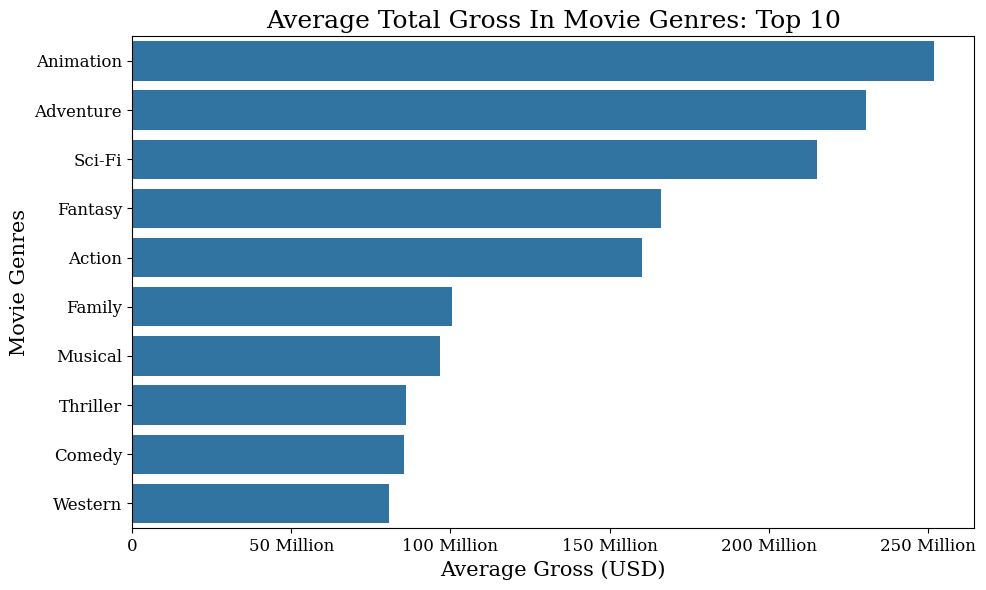

In [67]:
plt.rcParams.update({'font.family': 'he'})

# specify size of plot
fig, ax = plt.subplots(figsize=(10, 6))

# create bar graph of top 10 grossing genres
sns.barplot(data=bom_movie_basics_exploded_avg.sort_values('foreign_gross', ascending=False).head(10),
            x='foreign_gross',
            y='genres')

# Label & define fontsize for main and axis titles
plt.xlabel('Average Gross (USD)', fontsize=15)
plt.ylabel('Movie Genres', fontsize=15)
plt.title('Average Total Gross In Movie Genres: Top 10', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=12)

# set x=axis tick labels
ax.set_xticklabels(['0', '50 Million', '100 Million',
                  '150 Million', '200 Million', '250 Million', '300 Million', '350 Million', '400 Million', '450 Million'])

# Normalizing scientific notation
plt.tight_layout()
plt.show()

# Exploratory Data Analysis